<h1 style="text-align:center; color:green;">EDA on Flight prices across the major cities of India.</h1>
<hr>
<p>Routes we will be analyzing are:Mumbai(BOM) ↔️ Bengaluru(BLR) Delhi(DEL) ↔️ Bengaluru(BLR) Delhi(DEL) ↔️ Mumbai(BOM) Delhi(DEL) ↔️ Kolkata(CCU) Delhi(DEL) ↔️ Hyderabad (HYD)</p>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FlightName     90 non-null     object
 1   FlightCode     90 non-null     object
 2   DepartingCity  90 non-null     object
 3   DepartingTime  90 non-null     object
 4   ArrivingCity   90 non-null     object
 5   ArrivingTime   90 non-null     object
 6   Duration       90 non-null     object
 7   Price          90 non-null     int32 
 8   DepartingHour  90 non-null     int32 
dtypes: int32(2), object(7)
memory usage: 5.8+ KB


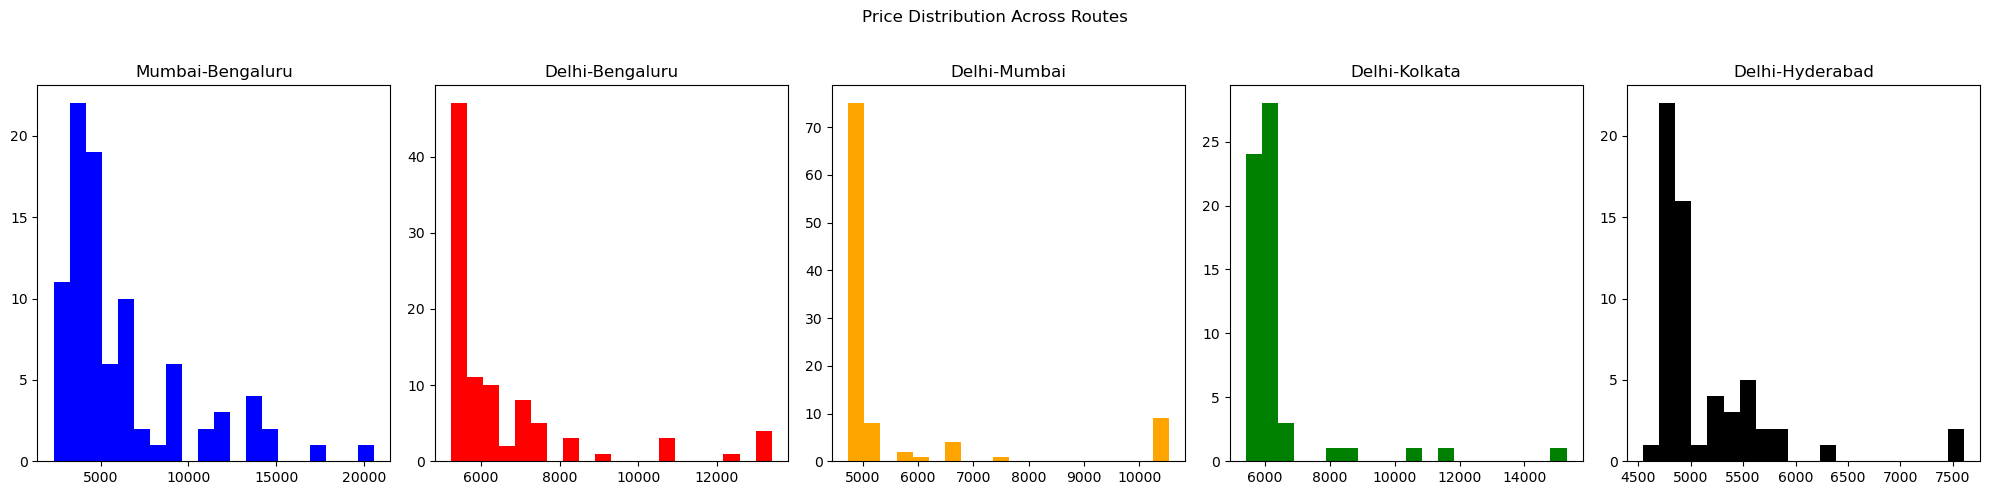

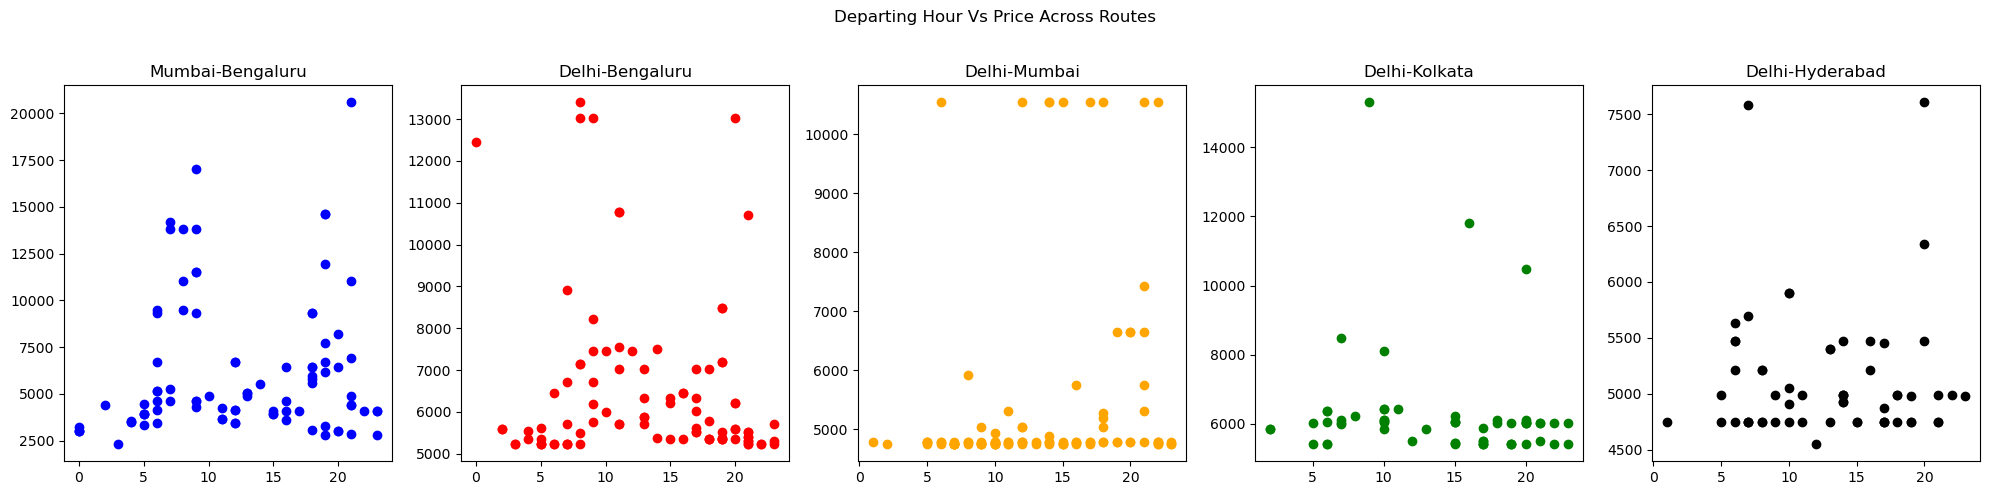

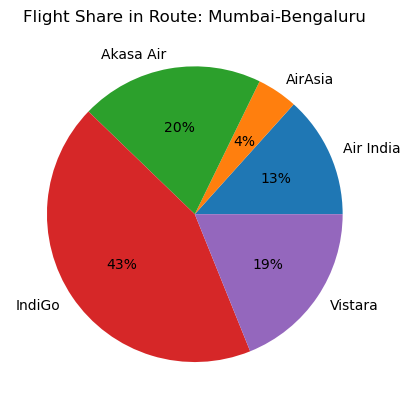

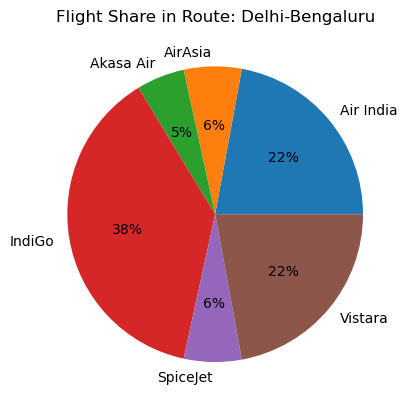

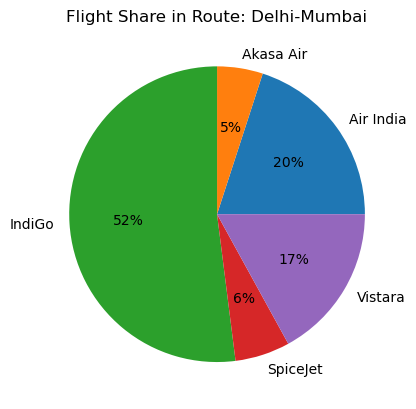

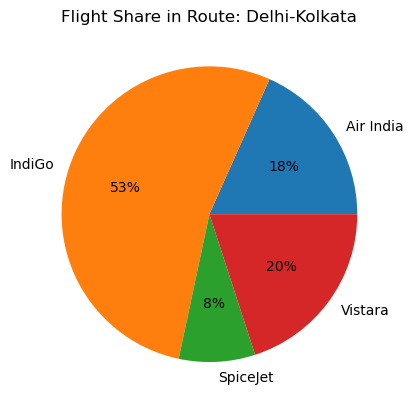

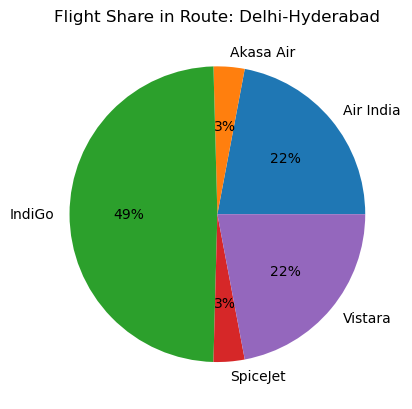

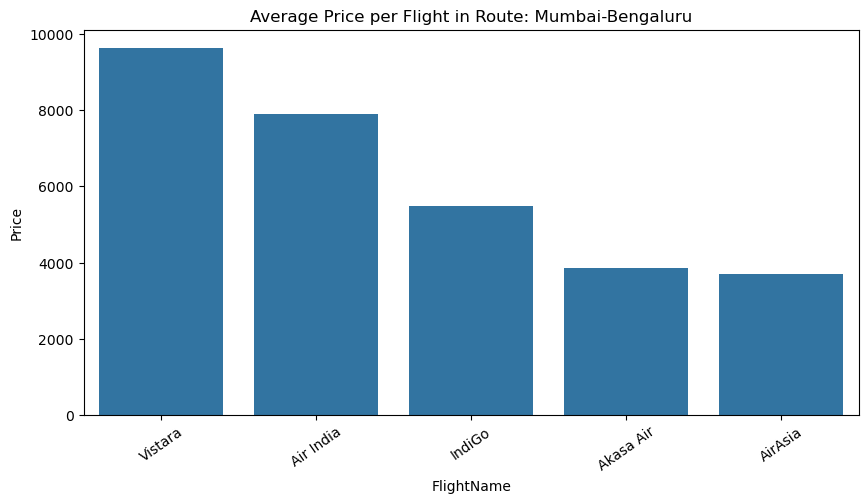

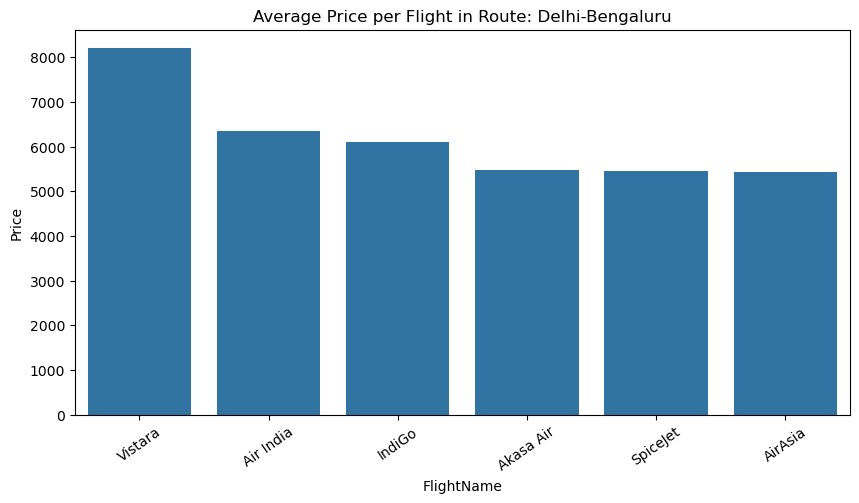

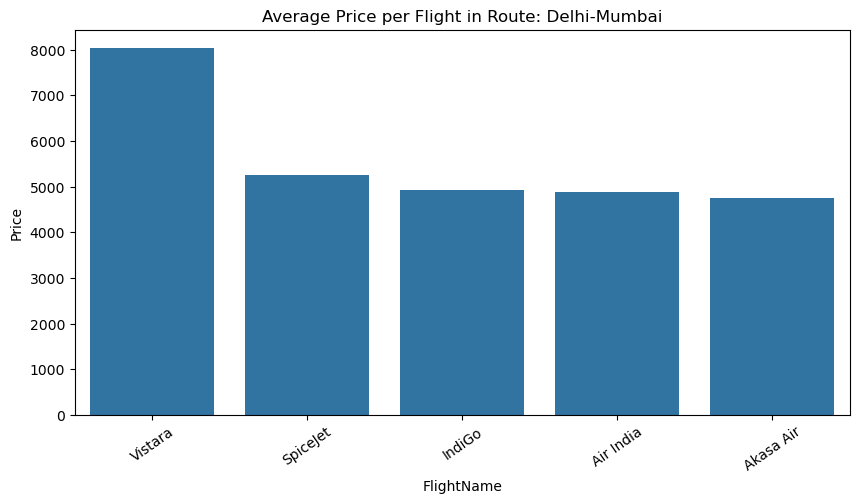

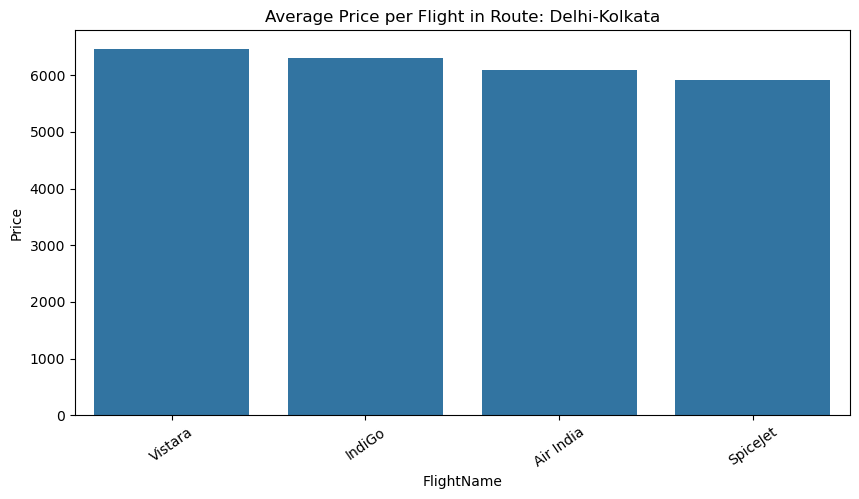

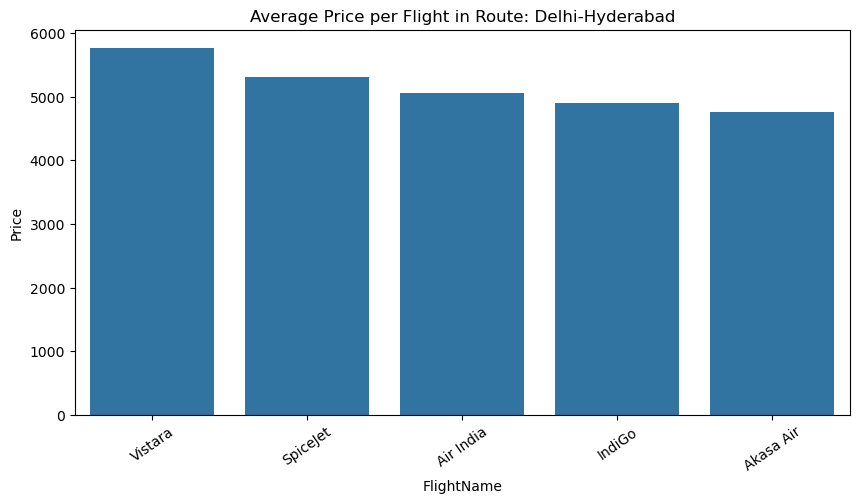

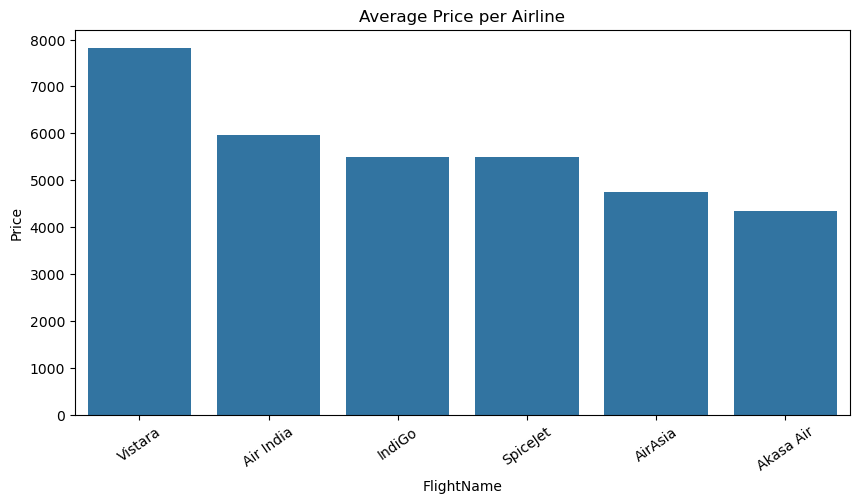

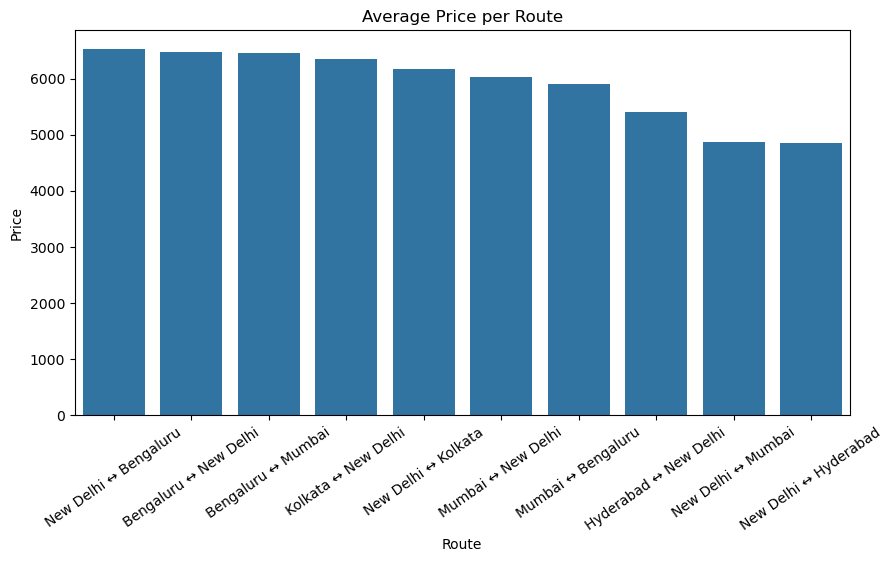

Insights:
1. Vistara is the costliest airline in the country.
2. Indigo has the most flight routes covered.
3. Flights during early morning and midnight tend to have higher prices.
4. Costliest route is New Delhi ↔ Bengaluru.


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# Reading CSV files
df_1 = pd.read_csv(r'D:\\ACER UFD\\flight_data_BOM_BLR.csv', encoding='unicode_escape')
df_2 = pd.read_csv(r'D:\\ACER UFD\\flight_data_DEL_BLR.csv', encoding='unicode_escape')
df_3 = pd.read_csv(r'D:\\ACER UFD\\flight_data_DEL_BOM.csv', encoding='unicode_escape')
df_4 = pd.read_csv(r'D:\\ACER UFD\\flight_data_DEL_CCU.csv', encoding='unicode_escape')
df_5 = pd.read_csv(r'D:\\ACER UFD\\flight_data_DEL_HYD.csv', encoding='unicode_escape')

# Displaying the first few rows of df_1 to verify loading
df_1.head()

# Data Preprocessing: Converting Price column to integer
for df in [df_1, df_2, df_3, df_4, df_5]:
    df["Price"] = df["Price"].str.replace(",", "").astype(int)

# Creating a new column for departing hour
for df in [df_1, df_2, df_3, df_4, df_5]:
    df["DepartingHour"] = df["DepartingTime"].str.split(":").str[0].astype(int)

# Verifying data types
df_1.info()

# Data Visualization
# Price Distribution
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].hist(df_1["Price"], bins=20, color="blue")
axes[0].set_title("Mumbai-Bengaluru")

axes[1].hist(df_2["Price"], bins=20, color="red")
axes[1].set_title("Delhi-Bengaluru")

axes[2].hist(df_3["Price"], bins=20, color="orange")
axes[2].set_title("Delhi-Mumbai")

axes[3].hist(df_4["Price"], bins=20, color="green")
axes[3].set_title("Delhi-Kolkata")

axes[4].hist(df_5["Price"], bins=20, color="black")
axes[4].set_title("Delhi-Hyderabad")

plt.suptitle("Price Distribution Across Routes")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Departing Hour Vs Price Scatter Plots
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].scatter(df_1["DepartingHour"], df_1["Price"], color="blue")
axes[0].set_title("Mumbai-Bengaluru")

axes[1].scatter(df_2["DepartingHour"], df_2["Price"], color="red")
axes[1].set_title("Delhi-Bengaluru")

axes[2].scatter(df_3["DepartingHour"], df_3["Price"], color="orange")
axes[2].set_title("Delhi-Mumbai")

axes[3].scatter(df_4["DepartingHour"], df_4["Price"], color="green")
axes[3].set_title("Delhi-Kolkata")

axes[4].scatter(df_5["DepartingHour"], df_5["Price"], color="black")
axes[4].set_title("Delhi-Hyderabad")

plt.suptitle("Departing Hour Vs Price Across Routes")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Analyzing Flight Share for Each Route
for df, route in zip([df_1, df_2, df_3, df_4, df_5], 
                     ["Mumbai-Bengaluru", "Delhi-Bengaluru", "Delhi-Mumbai", "Delhi-Kolkata", "Delhi-Hyderabad"]):
    df.groupby("FlightName").size().plot(kind='pie', autopct='%1.0f%%')
    plt.title(f"Flight Share in Route: {route}")
    plt.ylabel('')
    plt.show()

# Average Price per Flight for Each Route
for df, route in zip([df_1, df_2, df_3, df_4, df_5], 
                     ["Mumbai-Bengaluru", "Delhi-Bengaluru", "Delhi-Mumbai", "Delhi-Kolkata", "Delhi-Hyderabad"]):
    df_avg_price = df.groupby('FlightName')['Price'].mean().reset_index().astype({'Price':'int'}).sort_values(by='Price', ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x='FlightName', y='Price', data=df_avg_price)
    plt.title(f"Average Price per Flight in Route: {route}")
    plt.xticks(rotation=35)
    plt.show()

# Combining Data for Analysis Across All Routes
df_all = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0)

# Overall Average Price per Airline
df_avg_price_all = df_all.groupby('FlightName')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='FlightName', y='Price', data=df_avg_price_all)
plt.title("Average Price per Airline")
plt.xticks(rotation=35)
plt.show()

# Average Price per Route
df_avg_route = df_all.groupby(['DepartingCity', 'ArrivingCity'])['Price'].mean().reset_index().sort_values(by='Price', ascending=False)
df_avg_route["Route"] = df_avg_route["DepartingCity"] + " ↔ " + df_avg_route["ArrivingCity"]
plt.figure(figsize=(10, 5))
sns.barplot(x='Route', y='Price', data=df_avg_route)
plt.title("Average Price per Route")
plt.xticks(rotation=35)
plt.show()

# Insights
print("Insights:")
print("1. Vistara is the costliest airline in the country.")
print("2. Indigo has the most flight routes covered.")
print("3. Flights during early morning and midnight tend to have higher prices.")
print("4. Costliest route is New Delhi ↔ Bengaluru.")
